In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib notebook
import imageio
from celluloid import Camera
from IPython.display import HTML

In [35]:
class GCNConv(nn.Module):
    def __init__(self, A, in_channels, out_channels):
        super(GCNConv, self).__init__()
        self.A_hat = A+torch.eye(A.size(0))
        self.D     = torch.diag(torch.sum(A,1))
        self.D     = self.D.inverse().sqrt()
        self.A_hat = torch.mm(torch.mm(self.D, self.A_hat), self.D)
        self.W     = nn.Parameter(torch.rand(in_channels,out_channels, requires_grad=True))
    
    def forward(self, X):
        out = torch.relu(torch.mm(torch.mm(self.A_hat, X), self.W))
        return out

In [36]:
class Net(torch.nn.Module):
    def __init__(self,A, nfeat, nhid, nout):
        super(Net, self).__init__()
        self.conv1 = GCNConv(A,nfeat, nhid)
        self.conv2 = GCNConv(A,nhid, nout)
        
    def forward(self,X):
        H  = self.conv1(X)
        H2 = self.conv2(H)
        return H2

In [37]:
A=torch.Tensor([[0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
                [1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
                [1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0],
                [1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1],
                [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1],
                [0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1],
                [0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0]
                ])

In [38]:
target=torch.tensor([0,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,1])

In [39]:
target

tensor([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1])

In [40]:
X=torch.eye(A.size(0))

In [41]:
X

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [42]:
T=Net(A,X.size(0), 10, 2)

In [43]:
T

Net(
  (conv1): GCNConv()
  (conv2): GCNConv()
)

In [44]:
criterion = torch.nn.CrossEntropyLoss(ignore_index=-1)
optimizer = optim.SGD(T.parameters(), lr=0.01, momentum=0.9)

In [45]:
loss=criterion(T(X),target)

In [46]:
loss

tensor(0.8108, grad_fn=<NllLossBackward>)

In [31]:
l

tensor([[10.3833,  5.3692],
        [ 6.4233,  4.1499],
        [ 5.2637,  5.8425],
        [ 5.7207,  3.6705],
        [ 6.4627,  3.0762],
        [ 7.2075,  3.7246],
        [ 7.3478,  3.8746],
        [ 4.6583,  3.2734],
        [ 3.7180,  4.9434],
        [ 2.5270,  4.9815],
        [ 6.4052,  3.0445],
        [ 8.1566,  2.4157],
        [ 5.2178,  2.7996],
        [ 4.6656,  4.0296],
        [ 2.2988,  5.5637],
        [ 2.4694,  5.0331],
        [ 6.5788,  3.5230],
        [ 4.8576,  2.4149],
        [ 2.5294,  5.4733],
        [ 4.1934,  3.6685],
        [ 3.0505,  5.8977],
        [ 5.0959,  2.7092],
        [ 2.1971,  5.6038],
        [ 3.4871,  6.2963],
        [ 3.6290,  4.6367],
        [ 3.6396,  4.7607],
        [ 2.6304,  6.1092],
        [ 3.5176,  5.1962],
        [ 3.2396,  4.1678],
        [ 3.0734,  6.6483],
        [ 3.3659,  4.7613],
        [ 4.6457,  5.7321],
        [ 4.2129,  8.8611],
        [ 5.1694, 10.1589]], grad_fn=<ReluBackward0>)

In [32]:
l.detach().numpy()[:,0]

array([10.383287 ,  6.423272 ,  5.2636623,  5.7206655,  6.462685 ,
        7.2074623,  7.347789 ,  4.6582522,  3.71804  ,  2.5269947,
        6.405184 ,  8.15662  ,  5.2178197,  4.6655903,  2.2988338,
        2.4693866,  6.578847 ,  4.8575935,  2.5293593,  4.1933694,
        3.050523 ,  5.0959105,  2.1971378,  3.487067 ,  3.628972 ,
        3.639626 ,  2.6304386,  3.5175872,  3.2396417,  3.0734468,
        3.3658733,  4.6457405,  4.212898 ,  5.169449 ], dtype=float32)

<IPython.core.display.Javascript object>


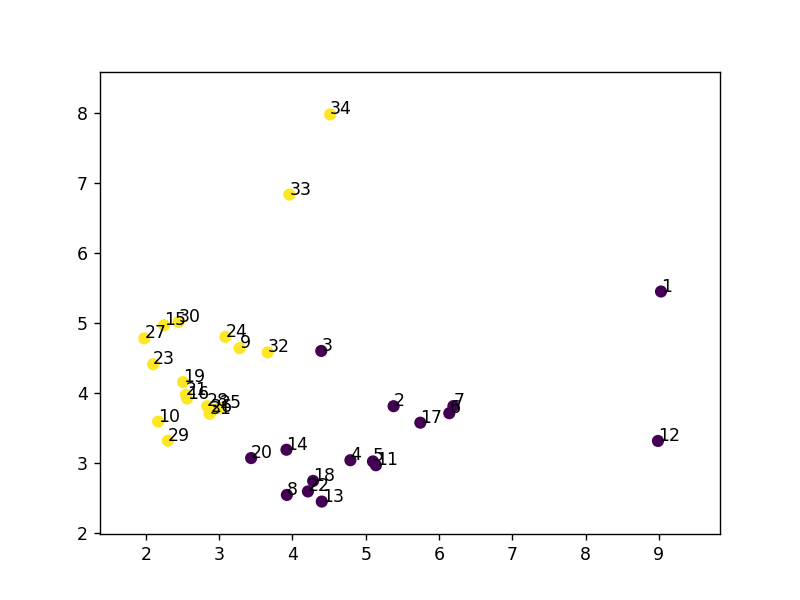

MovieWriter PillowWriter unavailable; using Pillow instead.


In [47]:
fig = plt.figure()
camera = Camera(fig)

for i in range(200):
    optimizer.zero_grad()
    loss=criterion(T(X), target)
    loss.backward()
    optimizer.step()
    l=(T(X));

    plt.scatter(l.detach().numpy()[:,0],l.detach().numpy()[:,1],c=[0, 0, 0, 0 ,0 ,0 ,0, 0, 1, 1, 0 ,0, 0, 0, 1 ,1 ,0 ,0 ,1, 0, 1, 0 ,1 ,1, 1, 1, 1 ,1 ,1, 1, 1, 1, 1, 1 ])
    for i in range(l.shape[0]):
        text_plot = plt.text(l[i,0], l[i,1], str(i+1))

    camera.snap()

    if i%20==0:
        print("Cross Entropy Loss: =", loss.item())

animation = camera.animate(blit=False, interval=150)
animation.save('./nodes.gif',writer='PillowWriter')